In [1]:
# root para fazer download dos dados
import uproot

# numpy para manipulação dos vetores
import numpy as np
from itertools import chain

# plotagem
import matplotlib.pyplot as plt
import seaborn as sns

# para resolver a integral
import sympy

import yaml

In [2]:
conf = yaml.load(open('config.yml'), Loader=yaml.FullLoader)

FileNotFoundError: [Errno 2] No such file or directory: '/app/config.yml'

# Exercício 1

In [3]:
## p0 * sin (p1 * x) / x
# definindo a função:

def f(x, p0, p1):
    return p0 * np.sin(p1 * x) / x

# para os valores de x:

x = np.linspace(0.1, 10, 1000)



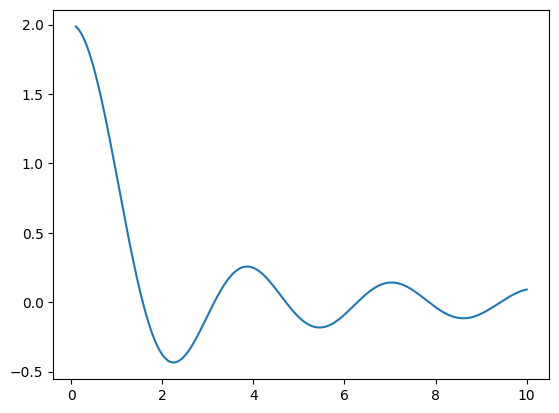

In [4]:
p0 = 1
p1 = 2
plt.plot(x, f(x, p0, p1))

In [5]:
# integral

x = sympy.Symbol('x')
p0 = sympy.Symbol('p0')
p1 = sympy.Symbol('p1')

integral = sympy.integrate(1 * sympy.sin(2 * x) / x, (x, 0, 3))

In [6]:
integral.evalf()

1.42468755128051

In [7]:
# onde "Si" é a integral do seno

Exercício 2:

Plotar gŕafico de erro

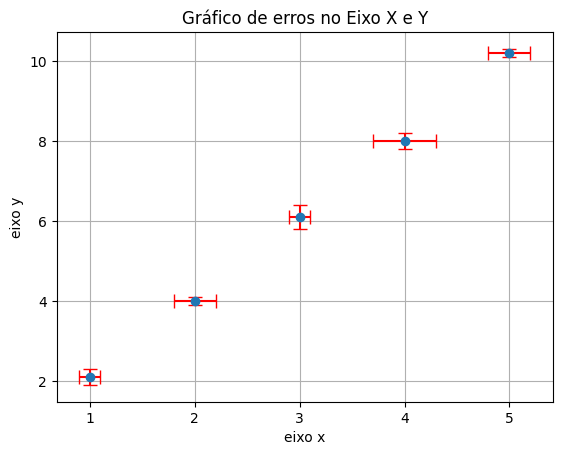

In [8]:
x = [1, 2, 3, 4, 5]             
y = [2.1, 4.0, 6.1, 8.0, 10.2]  
x_err = [0.1, 0.2, 0.1, 0.3, 0.2]  
y_err = [0.2, 0.1, 0.3, 0.2, 0.1] 

plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5)
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.title('Gráfico de erros no Eixo X e Y')
plt.grid(True)
plt.show()  


# Exercício 3:

In [9]:
from scipy.stats import skew, kurtosis

In [10]:
mu = 5
sigma = 2

data = np.random.normal(mu, sigma, 10000)

mean = np.mean(data)
underflow_value = 0
overflow_value = 10
skew_value = skew(data)
kurtosis_value = kurtosis(data)
# RMS = root mean square
rms = np.sqrt(np.mean(data**2))
# integral do histograma??


In [11]:
msg = f"""
total de eventos: {len(data)}
média: {mean}
underflow: {underflow_value}
qtd abaixo do underflow: {len(data[data < underflow_value])}
overflow: {overflow_value}
qtd acima do overflow: {len(data[data > overflow_value])}
skew: {skew_value}
kurtosis: {kurtosis_value}
rms: {rms}

"""
print(msg)


total de eventos: 10000
média: 5.020795613018699
underflow: 0
qtd abaixo do underflow: 62
overflow: 10
qtd acima do overflow: 55
skew: -0.017467527647989853
kurtosis: -0.06174464171773719
rms: 5.407167225332394




<Axes: ylabel='Count'>

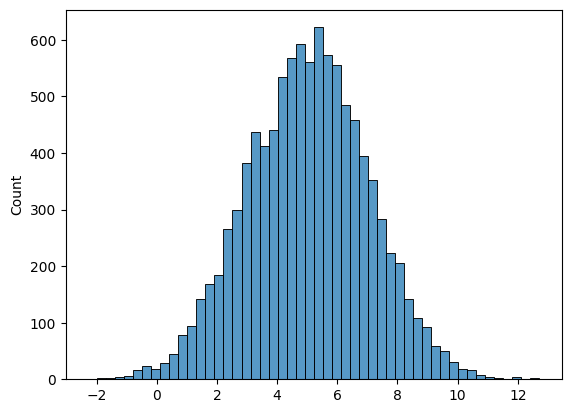

In [12]:
sns.histplot(data, bins=50)

In [13]:
file = uproot.open(conf['root_url'])

In [14]:
array = file['Events;1']['Muon_pt'].array(library='np')
array_err = file['Events;1']['Muon_ptErr'].array(library='np')

In [15]:
#       ISSO REMOVE OS VETORES VAZIOS
array = np.array(list(chain.from_iterable(array)))
array_err = np.array(list(chain.from_iterable(array_err)))

In [16]:
array

array([ 16.022831,  40.555103,  34.59234 , ..., 114.64467 ,  31.132769,
        18.414816], dtype=float32)

In [17]:
file.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [18]:
file['Events;1'].typenames()

{'run': 'uint32_t',
 'luminosityBlock': 'uint32_t',
 'event': 'uint64_t',
 'HTXS_Higgs_pt': 'float',
 'HTXS_Higgs_y': 'float',
 'HTXS_stage1_1_cat_pTjet25GeV': 'int32_t',
 'HTXS_stage1_1_cat_pTjet30GeV': 'int32_t',
 'HTXS_stage1_1_fine_cat_pTjet25GeV': 'int32_t',
 'HTXS_stage1_1_fine_cat_pTjet30GeV': 'int32_t',
 'HTXS_stage1_2_cat_pTjet25GeV': 'int32_t',
 'HTXS_stage1_2_cat_pTjet30GeV': 'int32_t',
 'HTXS_stage1_2_fine_cat_pTjet25GeV': 'int32_t',
 'HTXS_stage1_2_fine_cat_pTjet30GeV': 'int32_t',
 'HTXS_stage_0': 'int32_t',
 'HTXS_stage_1_pTjet25': 'int32_t',
 'HTXS_stage_1_pTjet30': 'int32_t',
 'HTXS_njets25': 'uint8_t',
 'HTXS_njets30': 'uint8_t',
 'nboostedTau': 'uint32_t',
 'boostedTau_chargedIso': 'float[]',
 'boostedTau_eta': 'float[]',
 'boostedTau_leadTkDeltaEta': 'float[]',
 'boostedTau_leadTkDeltaPhi': 'float[]',
 'boostedTau_leadTkPtOverTauPt': 'float[]',
 'boostedTau_mass': 'float[]',
 'boostedTau_neutralIso': 'float[]',
 'boostedTau_phi': 'float[]',
 'boostedTau_photonsOutsid

In [19]:
file['Runs;1'].typenames()

{'run': 'uint32_t',
 'genEventCount': 'int64_t',
 'genEventSumw': 'double',
 'genEventSumw2': 'double',
 'nLHEScaleSumw': 'uint32_t',
 'LHEScaleSumw': 'double[]',
 'nLHEPdfSumw': 'uint32_t',
 'LHEPdfSumw': 'double[]'}

In [20]:
# Muon_ptErr

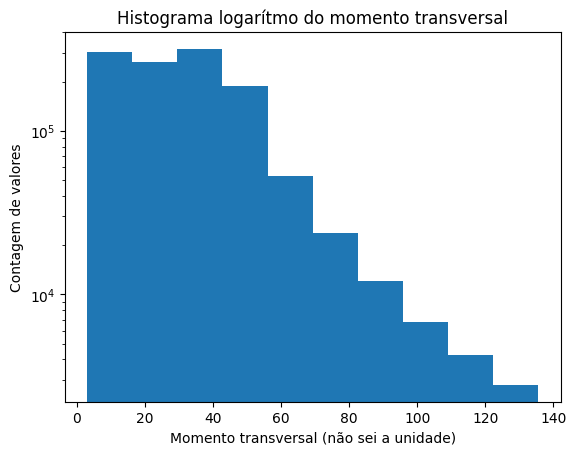

In [21]:
plt.hist(array, range=(min(array), np.quantile(array, 0.99)), log=True)
plt.title("Histograma logarítmo do momento transversal")
plt.xlabel("Momento transversal (não sei a unidade)")
plt.ylabel("Contagem de valores")
plt.show()

In [22]:
array_err

array([1.109375  , 0.703125  , 0.30078125, ..., 1.71875   , 0.34765625,
       0.17773438], dtype=float32)

Exercício 4 (?):

In [23]:
array_filtrado = array[array_err > 0.2]

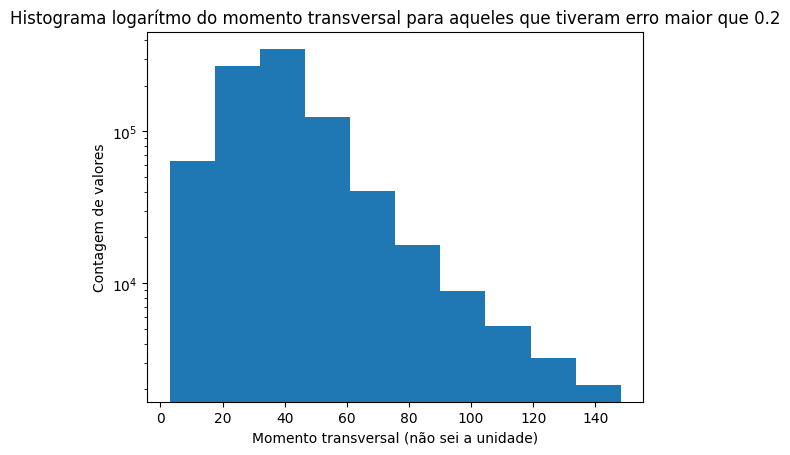

In [24]:
plt.hist(array_filtrado, range=(min(array_filtrado), np.quantile(array_filtrado, 0.99)), log=True)
plt.title("Histograma logarítmo do momento transversal para aqueles que tiveram erro maior que 0.2")
plt.xlabel("Momento transversal (não sei a unidade)")
plt.ylabel("Contagem de valores")
plt.show()